In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from glob import glob

from sys import path
path.insert(0, "lib")
from colorline import colorline
from SGD_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer, ExponentialConvectionTerm

from fipy.tools import numerix

In [7]:
def q(w):
    return w-.5
    
def grad_q(w):
    return 1.

lr = .001
w_init = 0.5
nsamp = 10**6
batchsize = 20
seed = 42
nsteps = 10
filename = 'data/linear_'
save_data(lr, q, grad_q, w_init, nsamp, batchsize, seed, nsteps, filename)

FileNotFoundError: [Errno 2] No such file or directory: 'data/linear_lr0.001_winit_0.5_nsamp1000000_b20_seed42_nsteps10.dat'

In [6]:
a = 1.97

def q(w):
    return (w-1.)*(w-2*a-1.)**2.
    
def grad_q(w):
    return (w-2*a-1.)**2. + 2.*(w-1.)*(w-2*a-1.)

lr = .001
nsamp = 10**6
batchsize = 100
nsteps = 10**4
filename = f'data/double_a{a}_'
nseed = 10**4
for seed in range(0, nseed):
    state = np.random.RandomState(seed=seed)
    w_init = state.uniform(0, 2*a + 2)
    save_data(lr, q, grad_q, w_init, nsamp, batchsize, seed, nsteps, filename)

FileNotFoundError: [Errno 2] No such file or directory: 'data/double_a1.97_lr0.001_winit_3.259952213328309_nsamp1000000_b100_seed0_nsteps10000.dat'

In [122]:
files = glob(f'data/double_a{a}_*.dat')
data = np.array([np.loadtxt(file) for file in files])

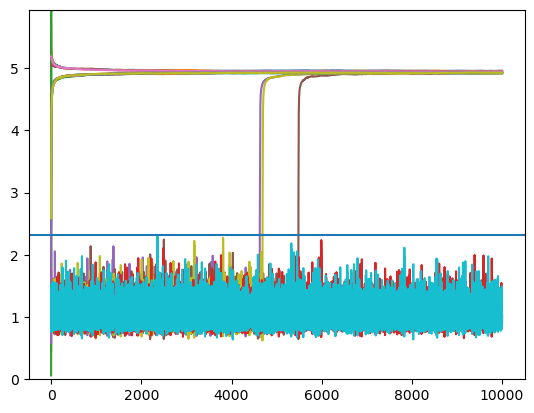

In [120]:
plt.plot(data.T)
plt.ylim(0, 2*a+2)
plt.axhline(y=(2 + 2*a + 1)/3)
plt.savefig('data.png', dpi=150)
plt.show()

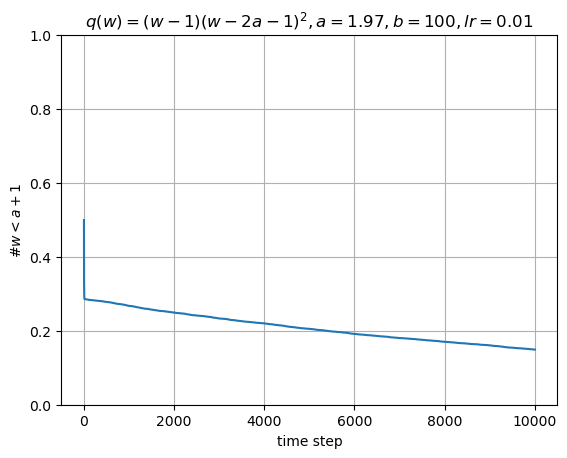

In [131]:
reg = np.mean(data < a + 1., axis = 0)
sing = np.mean(data > a + 1., axis = 0)
plt.plot(reg)
plt.grid()
plt.ylim(0,1)
plt.xlabel('time step')
plt.ylabel('$\# w < a + 1$')
plt.title(f'$q(w)=(w-1)(w-2a-1)^2, a={a}, b={batchsize}, lr={lr}$')
plt.savefig('escape.png', dpi=150)
plt.show()